In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

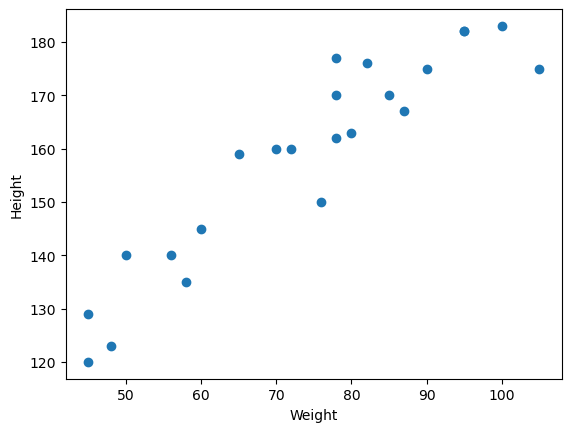

In [3]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
#divide dataset
x=df[["Weight"]]#independent feature
y=df["Height"]#dep feature


In [8]:
x.shape,y.shape

((23, 1), (23,))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [11]:
x_train.shape

(18, 1)

In [12]:
y_train.shape

(18,)

In [13]:
x_test.shape

(5, 1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
x_train=scaler.fit_transform(x_train)

In [17]:
x_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [18]:
x_test=scaler.transform(x_test)

In [19]:
x_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

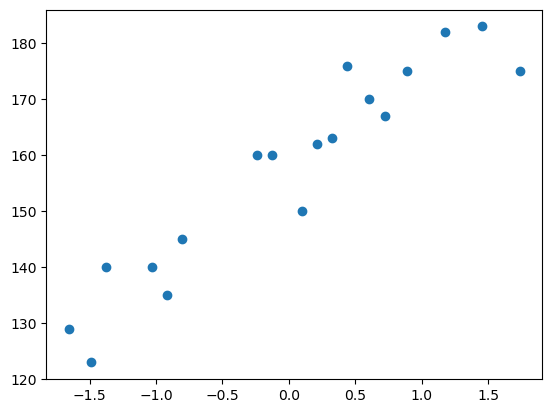

In [20]:
plt.scatter(x_train,y_train)

In [21]:
scaler.transform([[80]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [22]:
#model traing
from sklearn.linear_model import LinearRegression

In [23]:
regressor=LinearRegression()

In [24]:
##training the train data
regressor.fit(x_train,y_train)

LinearRegression()

In [25]:
regressor.intercept_

157.5

In [26]:
regressor.coef_

array([17.03440872])

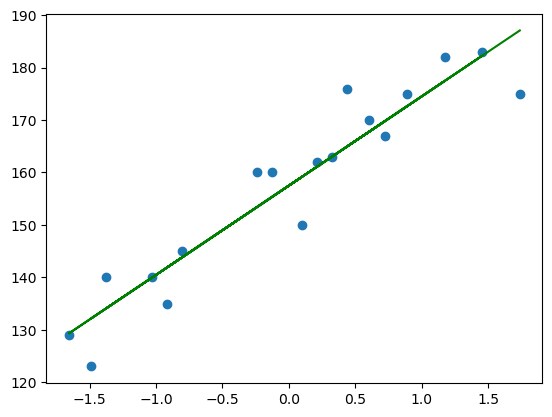

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'g')

In [28]:
#prediction for test data
y_pred_test=regressor.predict(x_test)

In [29]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [30]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

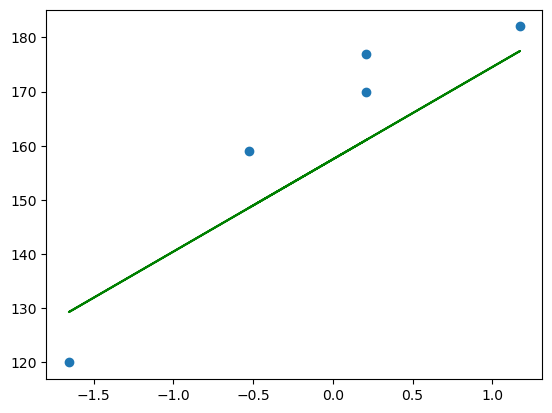

In [31]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'g')

In [32]:
##perforamce metric mse,rmse,r2 adjusted r 2

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [40]:
score

0.7769869860423441

In [41]:
##adjusted r2

In [42]:
regressor

LinearRegression()

In [43]:
#new datapt wt is 80
scaled_wt=scaler.fit_transform([[80]])
scaled_wt

array([[0.]])

In [46]:
print("height prediction for wt 80 is:",regressor.predict([scaled_wt[0]]))

height prediction for wt 80 is: [157.5]


In [ ]:
#assumptons
#plot scatter plot for prediction
